In [122]:
from typing import List, Dict, Tuple

Node = Tuple[int, int]

class Lattice:

    def __init__(self, n: int, skip_connections: Dict[Node, Node]) -> None:
        self.n = n
        self.skip_connections = skip_connections

    def get_neighbors(self, node: Node) -> List[int]:
        neighbors = []
        x,y = node
        if x + 1 < self.n:
            neighbors.append((x + 1, y))
        if x - 1 >= 0:
            neighbors.append((x - 1, y))
        if y + 1 < self.n:
            neighbors.append((x, y + 1))
        if y - 1 >= 0:
            neighbors.append((x, y - 1))
        neighbors.append(self.skip_connections[node])
        return neighbors
    

class LazySkipConnections:

    def __init__(self, n: int, alpha: float) -> None:
        self.n = n
        self.alpha = alpha
        self.skip_connections = {}
        self.visited = set()

    def _sample_neighbor(self, node: Node) -> Node:
        probas = {(k,l): manhattan_distance(node,(k,l))**-self.alpha for k in range(self.n) for l in range(self.n) if (k,l) != node}
        sum_probas = sum(probas.values())
        probas = {k: v/sum_probas for k,v in probas.items()}
        idx = np.random.choice(np.arange(len(probas)), p=list(probas.values()))
        return list(probas.keys())[idx]

    def __getitem__(self, node: Node) -> List[int]:
        if node not in self.visited:
            self.skip_connections[node] = self._sample_neighbor(node)
            self.visited.add(node)
        return self.skip_connections[node]


def manhattan_distance(node1: Node, node2: Node) -> float:
    return abs(node1[0] - node2[0]) + abs(node1[1] - node2[1])

def euclidean_distance(node1: Node, node2: Node) -> float:
    return ((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)**0.5


class Navigator:

    def __init__(self, start: Node, target: Node, current: Node = None, distance_metric: str = "euclidean") -> None:
        self.start = start
        self.target = target
        self.trajectory = [current if current else start]
        self.distance_metric = distance_metric

    @property
    def current(self) -> Node:
        return self.trajectory[-1]
    
    @property
    def trajectory_length(self) -> int:
        return len(self.trajectory) - 1

    def distance(self, node: Node) -> float:
        if self.distance_metric == "manhattan":
            return manhattan_distance(node, self.target)
        elif self.distance_metric == "euclidean":
            return euclidean_distance(node, self.target)
        else:
            raise ValueError("Invalid distance metric")

    def step(self, lattice: Lattice) -> None:
        # we could spare computing immediate neighbor distances if the skip connection is picked more often
        # so 1. check skip connection 2. check immediate neighbors
        neighbors = lattice.get_neighbors(self.current)
        distances = [self.distance(n) for n in neighbors]
        next_node = neighbors[distances.index(min(distances))]
        print(f"Current node: {self.current}, Next node: {next_node}")
        self.trajectory.append(next_node)

    def navigate(self, lattice: Lattice) -> None:
        while self.current != self.target:
            self.step(lattice)

import numpy as np 

def generate_lattice(n: int, alpha: float) -> Lattice:
    skip_connections = LazySkipConnections(n, alpha)
    return Lattice(n, skip_connections)

In [125]:
lattice = generate_lattice(1000, 0.1)
#lattice = Lattice(20000, )
navigator = Navigator((0,0), (999,999))
navigator.navigate(lattice)
print(navigator.trajectory)
print(navigator.trajectory_length)

Current node: (0, 0), Next node: (795, 283)
Current node: (795, 283), Next node: (795, 284)
Current node: (795, 284), Next node: (795, 285)
Current node: (795, 285), Next node: (795, 286)
Current node: (795, 286), Next node: (863, 659)
Current node: (863, 659), Next node: (863, 660)
Current node: (863, 660), Next node: (863, 661)
Current node: (863, 661), Next node: (863, 662)
Current node: (863, 662), Next node: (863, 663)
Current node: (863, 663), Next node: (863, 664)
Current node: (863, 664), Next node: (863, 665)
Current node: (863, 665), Next node: (863, 666)
Current node: (863, 666), Next node: (863, 667)
Current node: (863, 667), Next node: (863, 668)
Current node: (863, 668), Next node: (863, 669)
Current node: (863, 669), Next node: (910, 820)
Current node: (910, 820), Next node: (910, 821)
Current node: (910, 821), Next node: (910, 822)
Current node: (910, 822), Next node: (821, 969)
Current node: (821, 969), Next node: (822, 969)
Current node: (822, 969), Next node: (823, 9

KeyboardInterrupt: 

In [90]:
manhattan_distance((0,0), (19,19))

38

rdy


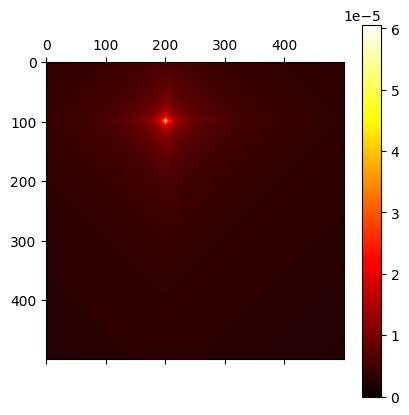

In [136]:
def generate_probability_matrix(k,l,n: int, alpha: float) -> np.ndarray:
    matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if (k,l) != (i,j):
                matrix[i,j] += manhattan_distance((i,j),(k,l))**-alpha
    return matrix / matrix.sum()

import matplotlib.pyplot as plt

matrix = generate_probability_matrix(100,200,500, 0.5)
print("rdy")
plt.matshow(matrix, cmap="hot")
plt.colorbar()

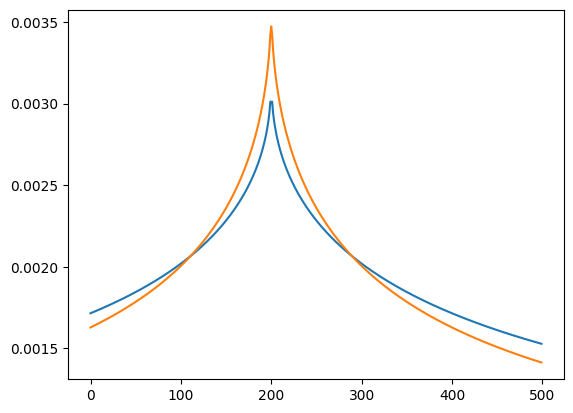

In [140]:
m1 = generate_probability_matrix(0,200,500, 0.5)
m2 = generate_probability_matrix(250,200,500, 0.5)

plt.plot(m1.sum(axis=0))
plt.plot(m2.sum(axis=0))

In [141]:
matrix.sum(axis=0).sum()

1.0000000000000002